In [1]:
from typing import Literal, Optional

import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.spatial.distance import pdist, squareform

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from pca import PCAWithEigenDecomposition, CustomKernelPCA

In [2]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

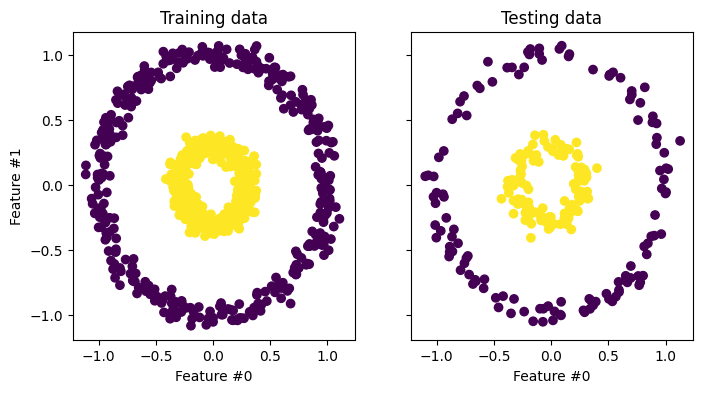

In [3]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

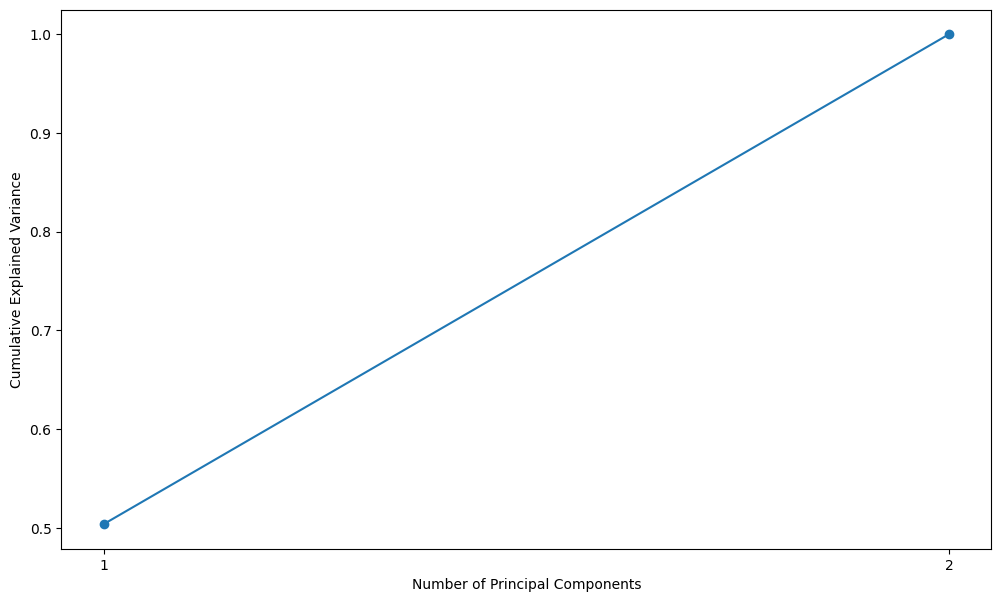

In [4]:
pca = PCA(n_components=2).fit(X_train)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
).fit(X_train)

custom_pca = PCAWithEigenDecomposition(n_components=2)

X_train_custom_pca = custom_pca.fit_transform(X_train_scaled)
X_test_custom_pca = custom_pca.transform(X_test_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_train_kernel_pca = kernel_pca.transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)
X_test_kernel_pca = kernel_pca.transform(X_test_scaled)

In [5]:
custom_kernal_pca = CustomKernelPCA(n_components=2)

X_train_custom_kernel_pca = custom_kernal_pca.fit_transform(X_train_scaled)
X_test_custom_kernel_pca = custom_kernal_pca.fit_transform(X_test_scaled)

Explained Variance:
[ 3.95251133e-01  1.25865519e-01  1.21884079e-01  7.92506186e-02
  6.32147683e-02  5.73439276e-02  3.06343648e-02  2.90443287e-02
  2.78969960e-02  2.77015022e-02  1.16033382e-02  1.06759141e-02
  3.89190547e-03  3.65797033e-03  3.18110343e-03  3.12604191e-03
  1.15272725e-03  1.04352933e-03  9.62029521e-04  3.88093852e-04
  3.54959168e-04  3.27082751e-04  3.07577916e-04  2.76330895e-04
  2.49988220e-04  1.28139990e-04  1.09395726e-04  8.15783667e-05
  7.37545729e-05  6.79336978e-05  5.69483552e-05  5.27759752e-05
  2.45915975e-05  2.30276398e-05  2.00111025e-05  1.67316922e-05
  1.28180144e-05  1.07625405e-05  6.91987188e-06  6.43565228e-06
  4.73087094e-06  4.31754496e-06  2.30589493e-06  2.06354672e-06
  1.77879310e-06  1.40329217e-06  1.26848777e-06  8.74807921e-07
  6.89661906e-07  4.58133934e-07  4.49620992e-07  3.67454757e-07
  3.19191754e-07  2.28806537e-07  1.66577208e-07  1.35722523e-07
  1.24986178e-07  1.20668246e-07  9.73614953e-08  7.93659944e-08
  6.6

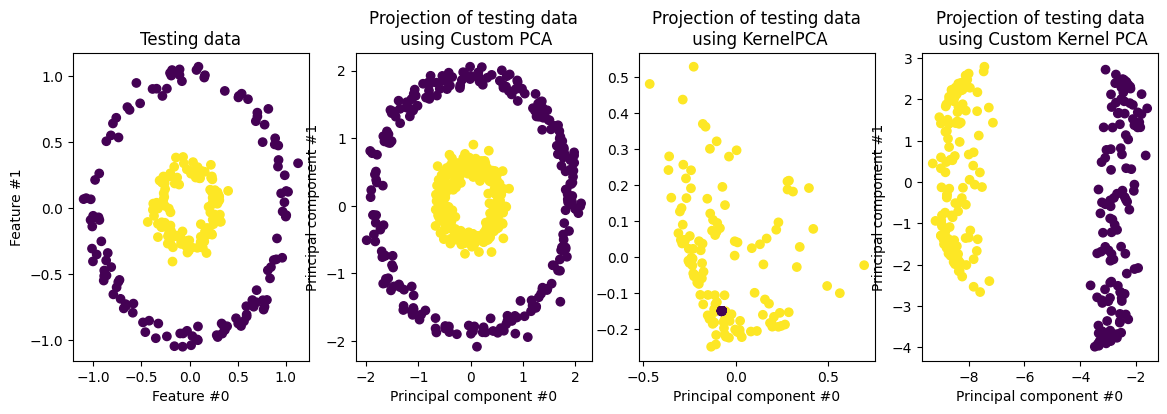

In [6]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax, custom_kernel_pca_proj_ax) = plt.subplots(
    ncols=4, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

pca_proj_ax.scatter(X_test_custom_pca[:, 0], X_test_custom_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using Custom PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

custom_kernel_pca_proj_ax.scatter(X_test_custom_kernel_pca[:, 0], X_test_custom_kernel_pca[:, 1], c=y_test)
custom_kernel_pca_proj_ax.set_ylabel("Principal component #1")
custom_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = custom_kernel_pca_proj_ax.set_title("Projection of testing data\n using Custom Kernel PCA")

In [7]:
def benchmark_models(pca_type: str, X_train: np.array, y_train: np.array, X_test: np.array, y_test: np.array) -> None:
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"PCA Type = '{pca_type}'")
          
    train_acc = accuracy_score(y_train_pred, y_train) * 100
    print(f"Training Acc = {train_acc:.2f}%")
    
    test_acc = accuracy_score(y_test_pred, y_test) * 100
    print(f"Testing Acc = {test_acc:.2f}%")

In [8]:
data = [
    {"pca_type": "No PCA", "X_train": X_train_scaled,
     "y_train": y_train, "X_test": X_test_scaled, "y_test": y_test},
    {"pca_type": "Custom Linear PCA", "X_train": X_train_custom_pca,
     "y_train": y_train, "X_test": X_test_custom_pca, "y_test": y_test},
    {"pca_type": "Scikit-Learn Linear PCA", "X_train": X_train_pca,
     "y_train": y_train, "X_test": X_test_pca, "y_test": y_test},
    {"pca_type": "Scikit-Learn Kernel PCA", "X_train": X_train_kernel_pca,
     "y_train": y_train, "X_test": X_test_kernel_pca, "y_test": y_test},
    {"pca_type": "Custom Kernel PCA", "X_train": X_train_custom_kernel_pca,
     "y_train": y_train, "X_test": X_test_custom_kernel_pca, "y_test": y_test}
]

print("Benchmarking the PCA Implementations:\n")
for benchmark_data in data:
    benchmark_models(**benchmark_data)
    print()

Benchmarking the PCA Implementations:

PCA Type = 'No PCA'
Training Acc = 51.07%
Testing Acc = 48.80%

PCA Type = 'Custom Linear PCA'
Training Acc = 51.07%
Testing Acc = 48.80%

PCA Type = 'Scikit-Learn Linear PCA'
Training Acc = 51.07%
Testing Acc = 48.80%

PCA Type = 'Scikit-Learn Kernel PCA'
Training Acc = 99.87%
Testing Acc = 99.20%

PCA Type = 'Custom Kernel PCA'
Training Acc = 100.00%
Testing Acc = 50.00%

